In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, initialize_parameters, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *
from load_2D_dataset import load_2D_dataset
from plot_decision_boundary import plot_decision_boundary

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

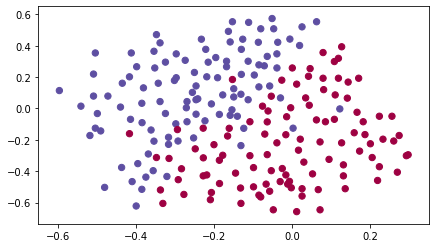

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [3]:
def model(X, Y, learning_rate = 0.3, num_iterations = 10100, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
      #  if i == 3547:
       #     print(a3)
        
        # Cost function
        cost = compute_cost(a3, Y)
            
        # Backward propagation.

        grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [4]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])      # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = (D1 < keep_prob).astype(int)                 # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1 * D1                                      # Step 3: shut down some neurons of A1
    A1 = A1/keep_prob                                # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])      # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = (D2 < keep_prob).astype(int)                 # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2 * D2                                      # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob                                # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    
    return A3, cache

In [5]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    #print(dZ3)
    dW3 = 1./m * np.dot(dZ3, A2.T)
    #print(dW3)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    #print(db3)
    dA2 = np.dot(W3.T, dZ3)
    #print(dA2)
    ### START CODE HERE ### (≈ 2 lines of code)
    #print(D2)
    dA2 = D2 * dA2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob         # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    #print(D1)
    dA1 = D1 * dA1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob         # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 0.6543912405149825
Cost after iteration 100: 0.31389856297565216
Cost after iteration 200: 0.28688959700015537
Cost after iteration 300: 0.2679225760205951
Cost after iteration 400: 0.24264741093946537
Cost after iteration 500: 0.22238352141697268
Cost after iteration 600: 0.20960659299743684
Cost after iteration 700: 0.20080441654358552
Cost after iteration 800: 0.19266003537658596
Cost after iteration 900: 0.18345821759483263
Cost after iteration 1000: 0.1759784892976791
Cost after iteration 1100: 0.1682801079530916
Cost after iteration 1200: 0.1604182167026897
Cost after iteration 1300: 0.15388395475091582
Cost after iteration 1400: 0.1488856282854693
Cost after iteration 1500: 0.14123484454984198
Cost after iteration 1600: 0.13225621917561545
Cost after iteration 1700: 0.12429916915489793
Cost after iteration 1800: 0.1186235630796328
Cost after iteration 1900: 0.11109783155467733
Cost after iteration 2000: 0.10396707442900778
Cost after iteration 2100: 0.100

C:\Users\Muhammad Hamza\Google Drive\Online Education\deeplearning.ai\2- Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization\Week 1\Lab#2\reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Muhammad Hamza\Google Drive\Online Education\deeplearning.ai\2- Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization\Week 1\Lab#2\reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


[[9.99990378e-01 1.00000000e+00 9.99999974e-01 9.99999976e-01
  9.99999935e-01 9.97430646e-01 9.42387088e-01 8.84317331e-01
  9.99997514e-01 9.99999988e-01 1.00000000e+00 1.00000000e+00
  9.99999994e-01 9.99999973e-01 9.98845264e-01 1.00000000e+00
  1.00000000e+00 9.99993087e-01 9.97886022e-01 9.99986498e-01
  1.23956104e-04 5.24059735e-02 2.61657000e-03 6.73889996e-06
  2.13275511e-09 4.46338971e-08 3.51648933e-08 1.28085835e-02
  6.01087719e-06 2.64702636e-02 1.18547407e-03 2.35004583e-06
  1.33781348e-07 1.20903914e-08 7.34362930e-06 9.43758098e-04
  6.62525866e-01 1.98423295e-01 2.01004263e-01 9.73794138e-04
  2.01004263e-01 2.01004263e-01 2.01004263e-01 1.54015064e-02
  2.01004263e-01 1.12743953e-02 3.62905473e-05 1.46949766e-07
  5.53850776e-08 2.99278794e-11 2.41682799e-06 8.27880901e-04
  2.60968021e-04 1.09528783e-03 4.92586943e-08 1.64944142e-09
  1.61869172e-09 1.98885512e-08 5.36417285e-06 8.14344841e-05
  5.55740515e-04 1.62716989e-04 2.07991529e-02 1.40083784e-02
  4.6054

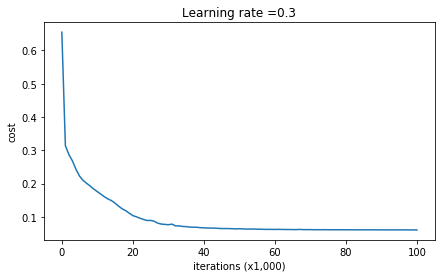

On the train set:
Accuracy: 0.9241706161137441
On the test set:
Accuracy: 0.95


In [6]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)